_This project was developed independently as part of Code Institute’s Predictive Analytics Project. Any datasets or templates used are openly provided by the course or via public sources like Kaggle. All commentary and code logic are my own._

# Notebook 3: Feature Engineering

## Objectives:

**Feature Selection:** 
- Determine the main determinants of home prices by evaluating the significance of characteristics using statistical techniques and a machine learning model (Random Forest).
- Reduce multicollinearity by eliminating superfluous characteristics.

**Feature Transformation:** 
- To lessen skewness and normalize features for modeling, apply transformations (such as log and standardization).
- Make sure machine learning methods are compatible by dynamically encoding categorical variables.

**Feature engineering:** 
- Using domain expertise, develop new characteristics such as house age, living area to lot area ratio, and overall quality-condition score.

**Results Validation:** 
- For tasks involving downstream modeling, save the modified training and testing datasets.

## Data Sources:
- house_prices_records.csv (raw house sales data)
- inherited_houses.csv (list of inherited properties)
- df_cleaned.csv (cleaned and pre-processed data from Data Cleaning stage)

Primary working file for Feature Engineering: `df_cleaned.csv`

## Extra Remarks

**Important Points:** 
- Feature engineering choices were informed by statistical techniques, exploratory investigations, and domain expertise.
- To guarantee consistency between the datasets, uniform transformations, scaling, and encoding approaches will be used.

**Methodology:** 
- This notebook follows the CRISP-DM methodology's Data Preparation and Transformation phases.

**Next Actions:**
- The price analysis notebook will use the converted datasets as inputs to investigate the connection between important characteristics and home values.
- Regression models that forecast home sale prices will also be trained and assessed using the datasets in the modeling notebook.

## Change Working Directory
- Since it is expected that you would keep the notebooks in a subfolder, you will need to switch the working directory when you run the notebook in the editor.
- The working directory must be changed from its current folder to its parent folder.
- We wish to change the current directory's parent to the new current directory.
- Verify the updated current directory.

In [2]:
# Smart Working Directory Setup
import os
project_root = '/workspaces/heritage_housing'
if os.getcwd() != project_root:
    try:
        os.chdir(project_root)
        print(f"[INFO] Changed working directory to project root: {os.getcwd()}")
    except FileNotFoundError:
        raise FileNotFoundError(f"[ERROR] Project root '{project_root}' not found!")

[INFO] Changed working directory to project root: /workspaces/heritage_housing


## Feature Selection

### Preview Initial Data
- Before start working on this section, we should preview what we're working with.

In [7]:
import pandas as pd

# Load cleaned data
df_cleaned = pd.read_csv('data/processed/df_cleaned.csv')

# Preview first few rows
df_cleaned.head()

,1stflrsf,2ndflrsf,bedroomabvgr,bsmtexposure,bsmtfinsf1,bsmtfintype1,bsmtunfsf,garagearea,garagefinish,garageyrblt,...,lotarea,lotfrontage,masvnrarea,openporchsf,overallcond,overallqual,totalbsmtsf,yearbuilt,yearremodadd,saleprice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,0.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


- Dataset contains `X` rows and `Y` columns.
- Includes numerical, categorical, and ordinal features.
- Target variable: **SalePrice**

## Transformation Identification

- We apply changes to the chosen features in order to enhance model performance. These conversions deal with problems like categorical encodings, scaling discrepancies, and skewness.
- The goal is to scale or normalize numerical features.
- Categorical features should be encoded.
- Deal with possible numerical feature outliers.

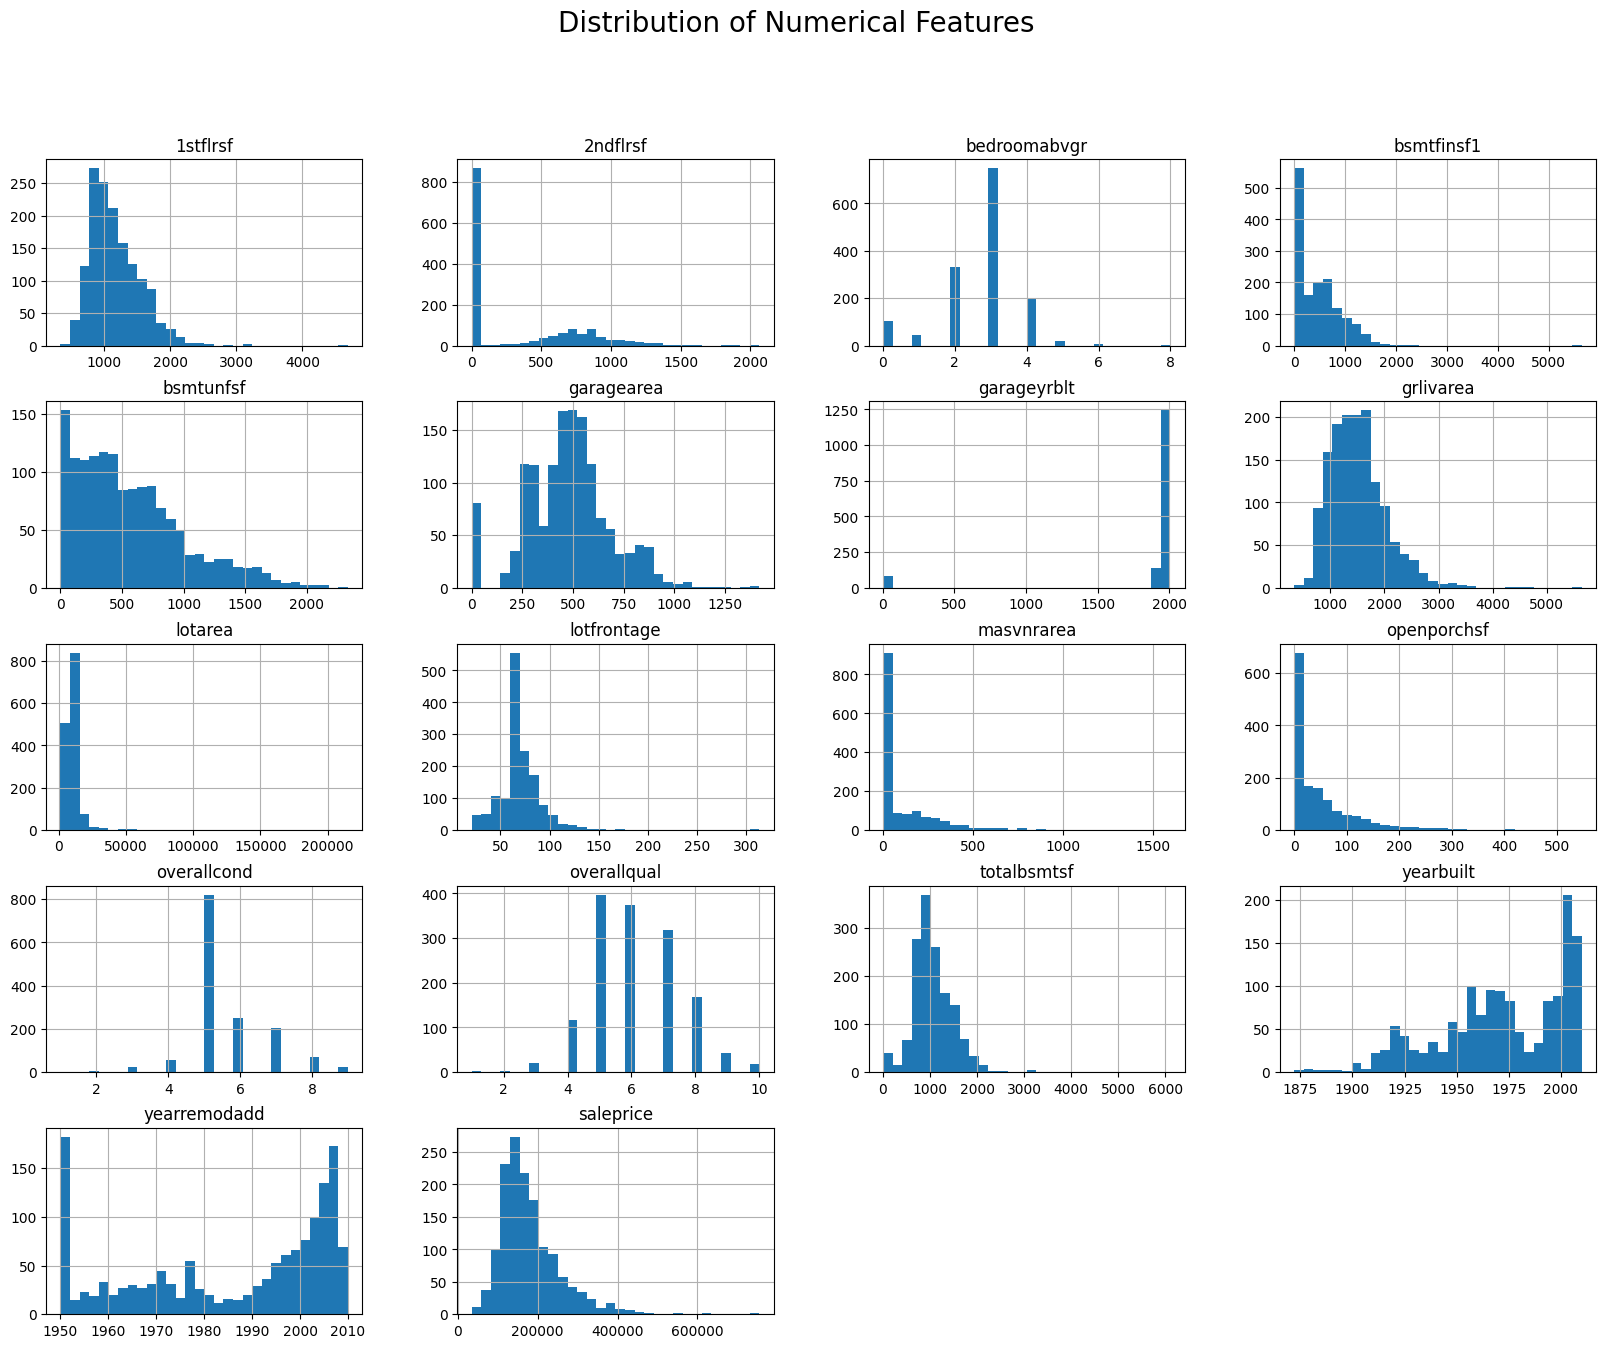

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking distribution of key numerical features
df_cleaned.hist(figsize=(20,15), bins=30)
plt.suptitle("Distribution of Numerical Features", fontsize=20)
plt.show()

### Observations:
- `lotarea`, `lotfrontage`, `openporchsf`, `totalbsmt_sf`, `grlivarea`, etc. are heavily right-skewed → They need transformation.
- `saleprice` is also right-skewed, but not extreme.
- `1stflrsf`, `2ndflrsf`, `bsmtfinsf1` also show right-skewed behavior.
- `overallqual` and `overallcond` are ordinal and categorical, not continuous — do not log-transform these.
- `yearbuilt`, `yearremodadd` — these are clearly bimodal or categorical by decades, so no transformation needed; maybe feature engineer "Era Built" like "Before 1950", "1950-1980", etc.
- `garageyearblt` — highly clumped around certain years, could be treated categorically (newer garage vs old).

### Transformation Plan:
**Log Transform**:
  - LotArea
  - LotFrontage
  - GrLivArea
  - OpenPorchSF
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - BsmtFinSF1
  - SalePrice (mildly)

**Categorical Bucketing**:
  - YearBuilt → Group into eras
  - GarageYrBlt → Group into eras (e.g., Pre-1980, Post-1980)

**Leave Untouched**:
  - OverallQual
  - OverallCond
  - YearRemodAdd (could be engineered but no scaling needed)


## Apply Key Transformations
Based on the analysis above, these transformations are applied: